#### Testing of the implementation of InceptionResNetV2 for classification of skin lesions using the MNIST-HAM10000 Dataset.
- Date : January 25th 2024
- Author : Aarya Bhave
- Project : Skin_Cancer_Diagnosis
  
This code carries out testing on the InceptionResNetV2 Model for classification of seven types of skin lesions.  
Before running this file locally, you must have Tensorflow-GPU installed with a dedicated GPU.
 

In [1]:
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

2024-01-26 16:26:26.581510: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-26 16:26:26.772182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 16:26:26.772299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 16:26:26.799557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 16:26:26.858210: I tensorflow/core/platform/cpu_feature_guar

##### Load Model

In [3]:
test_model = tf.keras.models.load_model("InceptionResNetV2_Loadable")

##### Set up generators and loaders

In [4]:
#Setup generator.
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input,
                            #    rotation_range=30,
                            #    width_shift_range=0.1,
                            #    height_shift_range=0.1,
                            #    shear_range=0.1,
                            #    zoom_range=0.2,
                            #    horizontal_flip=True,
                            #    fill_mode='nearest',
                            #    # rescale=1/255,
                               validation_split=0.15)

data_dir = 'data/reorganized'
batch_size = 32
target_size = (224,224)

#Setup loaders.
test_image_gen = image_gen.flow_from_directory(data_dir, 
                                          target_size=target_size, 
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=True,
                                          subset="validation")

print(test_image_gen.class_indices)

Found 1499 images belonging to 7 classes.
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


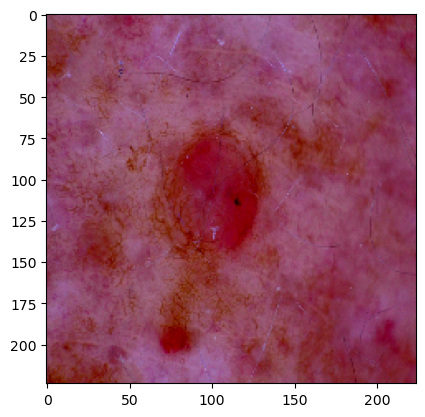

[0. 1. 0. 0. 0. 0. 0.]
(224, 224, 3)


In [29]:
import random
imag_data = test_image_gen.next()
img = imag_data[0][0]
label = imag_data[1][0] 
plt.imshow(img)
plt.show()
print(label)
print(img.shape)

In [30]:
print(tf.round(test_model(img.reshape(1,224, 224, 3))))

tf.Tensor([[0. 0. 1. 0. 0. 0. 0.]], shape=(1, 7), dtype=float32)
